In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install kmodes

In [ ]:
kprototype = KPrototypes(n_clusters=8, max_iter=100, num_dissim=euclidean_dissim, cat_dissim=matching_dissim,
                          init='Cao', n_init=10, gamma=None, verbose=0, random_state=None, n_jobs=1)

* **n_clusters** : cluster의 수
* **max_iter** : 최대 iteration 횟수
* num_dissim : numerical variable의 dissimilarity 함수 정의
* cat_dissim : categorical variable의 dissimilarity 함수 정의
* init : initialization 방법 정의 (Huang, Cao)
* **n_init** : cost에 따른 iteration당 클러스터링 반복 횟수 설정
* gamma : 가중치 설정
* verbose : verbosity mode
* n_jobs : computation을 위한 job의 수 결정

In [ ]:
import pandas as pd
data_2 = pd.read_csv('/content/drive/MyDrive/모델링 프로젝트/6th_merged_data.csv')

In [ ]:
import numpy as np

# 전처리 4/2 회의 후 

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                2500 non-null   object 
 1   종목코드               2500 non-null   float64
 2   업종                 2500 non-null   object 
 3   상장일                2500 non-null   object 
 4   지역                 2500 non-null   object 
 5   영문 종목명             2500 non-null   object 
 6   시장구분               2500 non-null   object 
 7   상장주식수              2500 non-null   float64
 8   ESG등급              955 non-null    object 
 9   환경                 955 non-null    object 
 10  사회                 955 non-null    object 
 11  지배구조               955 non-null    object 
 12  등락률                2380 non-null   float64
 13  거래량_x              2380 non-null   float64
 14  거래대금_x             2380 non-null   float64
 15  온실가스 배출량(tCO2-eq)  326 non-null    float64
 16  에너지 사용량(TJ)        326 n

* median으로 대체하기 전에 0이 있나 확인 먼저 하기

In [ ]:
data_2['업종 대분류'][data_2['업종 대분류']=='3'] = '전자부품 및 반도체 제조'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_2 = data_2.drop(data_2.index[1874])

In [ ]:
# 온실/매출 column에 0인 값이 많아서 np.nan으로 변경
data_2['온실가스/매출액'][data_2['온실가스/매출액']==0] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 전처리 할 열들만 먼저 선택 후 확인
data = data_2.iloc[:,[2,12,13,14,15,16,23,24,25,26,27,28,29,30,31,32,48,49,50]]

In [ ]:
len(data_2.업종.unique())

161

In [ ]:
data_2['업종 대분류'].unique()

array(['정보 통신 소프트웨어 및 공학연구', '금융', '의료기기 의약품 제조업', '전자부품 및 반도체 제조',
       '기타 제조업', '자동차, 기계, 장치, 장비 제조업', '화학제품 제조업', '기타 서비스업',
       '영화, 비디오물, 방송', '건축, 건설, 공사', '도매 소매업', '선박 및 보트 건조업', '사업지원 서비스업',
       '교육', '운송업', '농업 어업 축산업 광업'], dtype=object)

In [ ]:
col = data.columns[1:]
col = col.drop('업종 대분류')
col

Index(['등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)', '자산총계',
       '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y', '거래대금_y',
       '총개수', '기준가&종가 평균'],
      dtype='object')

In [ ]:
# 우리가 사용할 컬럼 median이 0인지 확인해 봤는데 0인 것은 없음 -> 그냥 median으로 채우면 될 듯
# 생각해보니까 0이 나올 수가 없는 구조임 nan값은 있어도, median이 0이면 음수의 값이 있다는건데 음수 값을 가질 col이 등략률밖에 없음
# 실제로 하나하나 다 봤는데 0인 값 없었음 했던대로 하면 될 듯함
t = data.groupby('업종').median()==0

In [ ]:
# 거래량 거래대금, 등락률 0인 기업들은 상장폐지 기업들인 듯
t.sum()

등락률                  9
거래량_x                1
거래대금_x               1
온실가스 배출량(tCO2-eq)    0
에너지 사용량(TJ)          0
자산총계                 0
자본금                  0
자본총계                 0
매출액                  0
영업이익                 0
순이익                  0
종가                   0
시가총액                 0
거래량_y                2
거래대금_y               2
총개수                  0
기준가&종가 평균            0
dtype: int64

In [ ]:
data.groupby('업종').median()

,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,영업이익,순이익,종가,시가총액,거래량_y,거래대금_y,총개수,기준가&종가 평균
업종,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,21.840,2.215949e+08,2462661.0,32627.5,659.0,2684655.5,74796.5,1750361.5,1945232.5,116203.0,120437.5,4477.5,1.715000e+11,183494.0,1.289837e+09,3.0,4215.0
1차 철강 제조업,23.140,8.259606e+07,551022.0,57273.0,1159.0,2596407.5,387311.0,1267170.0,2301368.5,138588.5,15418.0,6855.0,1.425000e+11,71068.5,3.999863e+08,3.0,5895.0
가구 제조업,-3.750,2.827323e+07,275729.0,NaN,NaN,628645.0,7900.0,364436.0,333177.0,22899.0,22503.0,25050.0,2.370000e+11,21742.0,1.590894e+08,3.0,24250.0
가전제품 및 정보통신장비 소매업,-25.350,2.296609e+08,1004644.5,NaN,NaN,2943545.0,118039.0,1827358.0,3869749.0,106835.0,-57452.0,13632.5,3.224943e+11,29711.0,3.160884e+08,1.0,16827.5
가정용 기기 제조업,19.090,7.608142e+07,1300803.0,NaN,NaN,420291.0,11271.0,234795.0,554571.5,50569.5,29456.5,17050.0,2.650000e+11,137285.0,2.516213e+09,4.5,11140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,23.600,1.122707e+09,3675832.0,NaN,NaN,6343764.0,534570.0,3542620.0,4069219.0,574792.0,526659.0,5570.0,8.380000e+11,701742.0,1.849588e+09,2.0,6775.0
"해체, 선별 및 원료 재생업",-68.290,1.385710e+08,1173442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4075.0,7.309070e+10,63975.0,2.636315e+08,1.0,7112.5
화학섬유 제조업,11.790,4.427651e+07,708370.0,323958.0,6985.0,2562536.0,22019.0,1389396.5,2206134.5,110860.0,261618.5,71500.0,5.200000e+11,37867.0,7.383540e+08,5.0,53550.0


In [ ]:
data_2.groupby('업종').describe()

종목코드                                                  \
                    count           mean            std      min      25%   
업종                                                                          
1차 비철금속 제조업          18.0   51886.111111   57162.794784    670.0   9747.5   
1차 철강 제조업            58.0   39894.827586   60037.349873    970.0   5160.0   
가구 제조업                8.0   50617.500000   46485.938504   3800.0  13190.0   
가전제품 및 정보통신장비 소매업     2.0   36420.000000   50091.444379   1000.0  18710.0   
가정용 기기 제조업            9.0   93498.888889   92681.557017   9450.0  42110.0   
...                   ...            ...            ...      ...      ...   
해상 운송업                5.0   18696.000000   17470.275613   3280.0   5880.0   
해체, 선별 및 원료 재생업       1.0   32860.000000            NaN  32860.0  32860.0   
화학섬유 제조업              9.0  146275.555556  120677.102956   3240.0  79980.0   
환경 정화 및 복원업           1.0   43910.000000            NaN  43910.0  43910.0   
회사 본부 및 경영 컨설팅 서비스업  12.0   22637.500000   29622.848407    150.0   1697.5   

                                                  상장주식수                 ...  \
                          50%       75%       max count           mean  ...   
업종                                                                      ...   
1차 비철금속 제조업           25330.0   76742.5  186230.0  18.0   40102.444444  ...   
1차 철강 제조업             15500.0   52062.5  306200.0  58.0   31311.137931  ...   
가구 제조업                44375.0   74750.0  134790.0   8.0   20474.000000  ...   
가전제품 및 정보통신장비 소매업     36420.0   54130.0   71840.0   2.0   23943.000000  ...   
가정용 기기 제조업            65350.0   71460.0  270660.0   9.0   21183.333333  ...   
...                       ...       ...       ...   ...            ...  ...   
해상 운송업                11200.0   28670.0   44450.0   5.0  321279.400000  ...   
해체, 선별 및 원료 재생업       32860.0   32860.0   32860.0   1.0   17936.000000  ...   
화학섬유 제조업             114630.0  294140.0  298050.0   9.0   23859.666667  ...   
환경 정화 및 복원업           43910.0   43910.0   43910.0   1.0   81294.000000  ...   
회사 본부 및 경영 컨설팅 서비스업   10980.0   35152.5  102260.0  12.0   28837.333333  ...   

                     기준가&종가 평균           온실가스/매출액                      \
                           75%       max    count      mean       std   
업종                                                                      
1차 비철금속 제조업           11888.75  639000.0      3.0  0.479597  0.387523   
1차 철강 제조업             16425.00  287750.0      6.0  0.497987  0.519051   
가구 제조업                46775.00   80650.0      0.0       NaN       NaN   
가전제품 및 정보통신장비 소매업     24026.25   31225.0      0.0       NaN       NaN   
가정용 기기 제조업            20975.00   46525.0      0.0       NaN       NaN   
...                        ...       ...      ...       ...       ...   
해상 운송업                11225.00   27450.0      0.0       NaN       NaN   
해체, 선별 및 원료 재생업        7112.50    7112.5      0.0       NaN       NaN   
화학섬유 제조업             396750.00  952000.0      3.0  0.327021  0.339166   
환경 정화 및 복원업            1411.50    1411.5      0.0       NaN       NaN   
회사 본부 및 경영 컨설팅 서비스업   35831.25  116950.0      1.0  0.046648       NaN   

                                                                       
                          min       25%       50%       75%       max  
업종                                                                     
1차 비철금속 제조업          0.085319  0.289399  0.493479  0.676736  0.859992  
1차 철강 제조업            0.061277  0.148510  0.314570  0.658049  1.431806  
가구 제조업                    NaN       NaN       NaN       NaN       NaN  
가전제품 및 정보통신장비 소매업         NaN       NaN       NaN       NaN       NaN  
가정용 기기 제조업                NaN       NaN       NaN       NaN       NaN  
...                       ...       ...       ...       ...       ...  
해상 운송업                    NaN       NaN       NaN       NaN       NaN  
해체, 선별 및 원료 재생업           NaN       NaN       NaN       NaN       NaN  
화학섬유 제조업            

In [ ]:
# 업종별로 groupby 했을 때 median이 0인 값이 얼마나 있는지 파악해봄 그냥 median으로 채워도 될 듯 함
for column in col:
    a = (data_2.groupby('업종')[column].median()==0)
    print(f'컬럼은 {column}이고 null은 {a.sum()}개 임')

컬럼은 등락률이고 null은 9개 임
컬럼은 거래량_x이고 null은 1개 임
컬럼은 거래대금_x이고 null은 1개 임
컬럼은 온실가스 배출량(tCO2-eq)이고 null은 0개 임
컬럼은 에너지 사용량(TJ)이고 null은 0개 임
컬럼은 자산총계이고 null은 0개 임
컬럼은 자본금이고 null은 0개 임
컬럼은 자본총계이고 null은 0개 임
컬럼은 매출액이고 null은 0개 임
컬럼은 영업이익이고 null은 0개 임
컬럼은 순이익이고 null은 0개 임
컬럼은 종가이고 null은 0개 임
컬럼은 시가총액이고 null은 0개 임
컬럼은 거래량_y이고 null은 2개 임
컬럼은 거래대금_y이고 null은 2개 임
컬럼은 총개수이고 null은 0개 임
컬럼은 기준가&종가 평균이고 null은 0개 임


In [ ]:
for column in col:
    data_2[column] = data_2[column].fillna(data_2.groupby('업종')[column].transform('median'))

In [ ]:
for column in col:
    data_2[column] = data_2[column].fillna(data_2.groupby('업종 대분류')[column].transform('median'))

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2500
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                2500 non-null   object 
 1   종목코드               2500 non-null   float64
 2   업종                 2500 non-null   object 
 3   상장일                2500 non-null   object 
 4   지역                 2500 non-null   object 
 5   영문 종목명             2500 non-null   object 
 6   시장구분               2500 non-null   object 
 7   상장주식수              2500 non-null   float64
 8   ESG등급              955 non-null    object 
 9   환경                 955 non-null    object 
 10  사회                 955 non-null    object 
 11  지배구조               955 non-null    object 
 12  등락률                2500 non-null   float64
 13  거래량_x              2500 non-null   float64
 14  거래대금_x             2500 non-null   float64
 15  온실가스 배출량(tCO2-eq)  2487 non-null   float64
 16  에너지 사용량(TJ)        2487 

In [ ]:
data_2['종목코드'] = data_2['종목코드'].astype(float)
data_2['상장주식수'] = data_2['상장주식수'].astype(float)

In [ ]:
float_columns = data_2.select_dtypes("float64").columns
float_df = data_2[float_columns]

object_columns = data_2.select_dtypes("object").columns
object_df = data_2[object_columns]
object_df = object_df.fillna('N')

In [ ]:
data_3 = pd.concat([object_df, float_df], axis = 1)

In [ ]:
data_3.columns

Index(['회사명', '업종', '상장일', '지역', '영문 종목명', '시장구분', 'ESG등급', '환경', '사회', '지배구조',
       'stock_name', 'corp_cls', '업종 대분류', '종목코드', '상장주식수', '등락률', '거래량_x',
       '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)', 'corp_code',
       'induty_code', 'est_dt', '2021년 NCSI', '자산총계', '자본금', '자본총계', '매출액',
       '영업이익', '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '통근버스운행', '본인학자금',
       '복지카드', '업무활동비', '자격증수당', '위험수당', '사대보험', '워크샵', '신입사원교육', '직무향상교육',
       '리더십교육', '해외연수지원', '도서비지원', '외국어교육지원', '자격증취득지원', '총개수', '기준가&종가 평균',
       '온실가스/매출액'],
      dtype='object')

In [ ]:
data_4 = data_3[data_3['ESG등급'] != 'N']
data_4.reset_index(inplace=True)
data_4 = data_4[[ '회사명', '업종', '상장일', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조',
       '종목코드', '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)',
       '에너지 사용량(TJ)',  '자산총계', '자본금', '자본총계', '매출액', '영업이익',
       '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균','총개수']]

In [ ]:
data_4['상장일']

0      2021-08-09
1      2021-07-06
2      2019-12-19
3      2019-11-29
4      2019-11-25
          ...    
950    1956-07-02
951    1956-07-02
952    1956-03-03
953    1956-03-03
954    1956-03-03
Name: 상장일, Length: 955, dtype: object

In [ ]:
from datetime import datetime
date_diff_list = [] 

for i in range(len(data_4['상장일'])):
  now  = datetime.now()
  now = datetime.strptime(str(now)[0:10], "%Y-%m-%d")
  date_to_compare = datetime.strptime(str(data_4['상장일'][i])[0:10], "%Y-%m-%d")
  date_diff = now - date_to_compare
  date_diff = str(date_diff)[:-14]
  date_diff_list.append(date_diff)

In [ ]:
date_diff_df = pd.DataFrame(date_diff_list)
date_diff_df.columns = ['상장기간']
data_4 = pd.concat([data_4, date_diff_df], axis = 1)

In [ ]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                955 non-null    object 
 1   업종                 955 non-null    object 
 2   상장일                955 non-null    object 
 3   지역                 955 non-null    object 
 4   시장구분               955 non-null    object 
 5   ESG등급              955 non-null    object 
 6   환경                 955 non-null    object 
 7   사회                 955 non-null    object 
 8   지배구조               955 non-null    object 
 9   종목코드               955 non-null    float64
 10  상장주식수              955 non-null    float64
 11  등락률                955 non-null    float64
 12  거래량_x              955 non-null    float64
 13  거래대금_x             955 non-null    float64
 14  온실가스 배출량(tCO2-eq)  951 non-null    float64
 15  에너지 사용량(TJ)        951 non-null    float64
 16  자산총계               955 non

In [ ]:
data_4['온실가스 배출량(tCO2-eq)'] = data_4['온실가스 배출량(tCO2-eq)'].fillna(data_4['온실가스 배출량(tCO2-eq)'].median())

In [ ]:
data_4['에너지 사용량(TJ)'] = data_4['에너지 사용량(TJ)'].fillna(data_4['에너지 사용량(TJ)'].median())

In [ ]:
data_4.isna().sum()

회사명                  0
업종                   0
상장일                  0
지역                   0
시장구분                 0
ESG등급                0
환경                   0
사회                   0
지배구조                 0
종목코드                 0
상장주식수                0
등락률                  0
거래량_x                0
거래대금_x               0
온실가스 배출량(tCO2-eq)    0
에너지 사용량(TJ)          0
자산총계                 0
자본금                  0
자본총계                 0
매출액                  0
영업이익                 0
순이익                  0
종가                   0
시가총액                 0
거래량_y                0
거래대금_y               0
기준가&종가 평균            0
총개수                  0
상장기간                 0
dtype: int64

# 스케일링

In [ ]:
data_4_object = data_4[['회사명', '업종', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조']]

In [ ]:
data_4_float = data_4[['상장주식수', '등락률', '거래량_x', '거래대금_x',
       '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)', '자산총계', '자본금', '자본총계',
       '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균',
       '상장기간','총개수']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_4_float_std  = scaler.fit_transform(data_4_float)

# 시각화 위해 데이터프레임으로 변환
data_4_float = pd.DataFrame(data_4_float_std, columns=data_4_float.columns, index=list(data_4_float.index.values))

In [ ]:
data_4 = pd.concat([data_4_float, data_4_object], axis = 1)
data_4.head(2)

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,상장기간,총개수,회사명,업종,지역,시장구분,ESG등급,환경,사회,지배구조
0,0.004819,0.190183,0.003631,0.010860,0.001123,0.003644,0.001170,0.003109,0.001530,0.001511,...,0.000000,0.0,PI첨단소재,플라스틱제품 제조업,충청북도,KOSPI,B+,B+,B,B+
1,0.002911,0.129244,0.003134,0.009055,0.001034,0.004015,0.001227,0.001797,0.001526,0.004093,...,0.001423,0.0,엠씨넥스,영상 및 음향기기 제조업,서울특별시,KOSPI,C,C,B,B


In [ ]:
X = data_4[['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분', '환경', '사회', '지배구조']]
Y = data_4[['ESG등급']]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 954
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   상장주식수              955 non-null    float64
 1   등락률                955 non-null    float64
 2   거래량_x              955 non-null    float64
 3   거래대금_x             955 non-null    float64
 4   온실가스 배출량(tCO2-eq)  955 non-null    float64
 5   에너지 사용량(TJ)        955 non-null    float64
 6   자산총계               955 non-null    float64
 7   자본금                955 non-null    float64
 8   자본총계               955 non-null    float64
 9   매출액                955 non-null    float64
 10  영업이익               955 non-null    float64
 11  순이익                955 non-null    float64
 12  종가                 955 non-null    float64
 13  시가총액               955 non-null    float64
 14  거래량_y              955 non-null    float64
 15  거래대금_y             955 non-null    float64
 16  기준가&종가 평균          955 non

In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 954
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ESG등급   955 non-null    object
dtypes: object(1)
memory usage: 14.9+ KB


# Elbow Method

In [ ]:
pip install kmodes

In [ ]:
from plotnine import *
import plotnine

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
kprototype = KPrototypes()

In [ ]:
cost = []
for cluster in range(2, 10):
    try:
        kprototype = KPrototypes(verbose=True, n_clusters = cluster, init = 'Huang', n_init=1)
        kprototype.fit_predict(X, categorical = [19,20,21,22,23,24,25])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 107, ncost: 404.1937049315254
Run: 1, iteration: 2/100, moves: 145, ncost: 401.6085694732298
Run: 1, iteration: 3/100, moves: 45, ncost: 401.3601649304034
Run: 1, iteration: 4/100, moves: 19, ncost: 396.5883605176847
Run: 1, iteration: 5/100, moves: 105, ncost: 396.28407447373377
Run: 1, iteration: 6/100, moves: 28, ncost: 396.1551082320588
Run: 1, iteration: 7/100, moves: 10, ncost: 396.1306156886657
Run: 1, iteration: 8/100, moves: 9, ncost: 396.1094620904858
Run: 1, iteration: 9/100, moves: 3, ncost: 396.1067091651409
Run: 1, iteration: 10/100, moves: 4, ncost: 396.103940622896
Run: 1, iteration: 11/100, moves: 0, ncost: 396.103940622896
Cluster initiation: 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 382, ncost: 379.78738463686574
Run: 1, iteration: 2/100, moves: 89, ncost: 379.0973301293492
Run: 1, it

In [ ]:
df_cost = pd.DataFrame({'Cluster':range(2, 10), 'Cost':cost})

In [ ]:
df_cost

,Cluster,Cost
0,2,396.103941
1,3,378.960626
2,4,365.786419
3,5,346.810030
4,6,338.105292
5,7,332.014774
6,8,317.731276
7,9,316.805013


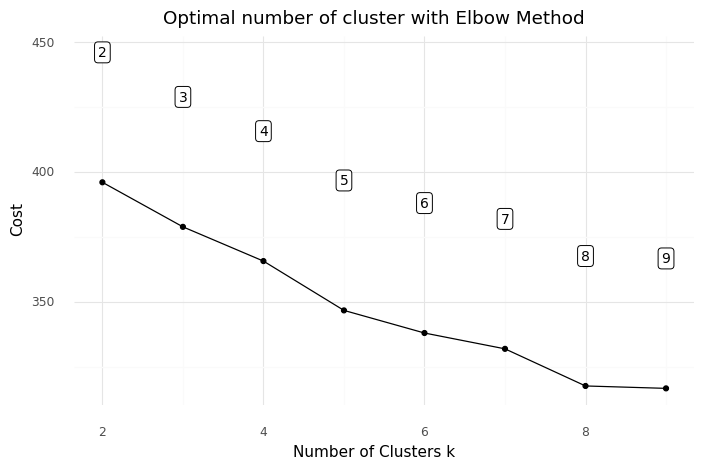

<ggplot: (8742077468625)>

In [ ]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 50) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

# 클러스터링

In [ ]:
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters=6, init='huang', n_init=1, verbose=True)
kp.fit_predict(X, categorical=[19,20,21,22,23,24,25])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 364, ncost: 351.5341378806476
Run: 1, iteration: 2/100, moves: 157, ncost: 346.26018395468685
Run: 1, iteration: 3/100, moves: 114, ncost: 344.49048282318716
Run: 1, iteration: 4/100, moves: 109, ncost: 340.4610715483132
Run: 1, iteration: 5/100, moves: 79, ncost: 339.8476202798835
Run: 1, iteration: 6/100, moves: 40, ncost: 339.6412345319993
Run: 1, iteration: 7/100, moves: 18, ncost: 339.5763844111989
Run: 1, iteration: 8/100, moves: 9, ncost: 339.5573265599284
Run: 1, iteration: 9/100, moves: 7, ncost: 339.5425840231806
Run: 1, iteration: 10/100, moves: 6, ncost: 339.5362669781221
Run: 1, iteration: 11/100, moves: 2, ncost: 339.53291627368293
Run: 1, iteration: 12/100, moves: 2, ncost: 339.53108066419185
Run: 1, iteration: 13/100, moves: 0, ncost: 339.53108066419185


array([2, 5, 0, 0, 2, 0, 2, 5, 0, 2, 2, 5, 2, 2, 5, 5, 2, 2, 4, 5, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 5, 5, 5, 5, 5, 5, 2, 5, 0, 5,
       0, 2, 5, 5, 2, 5, 4, 2, 2, 0, 4, 5, 0, 0, 0, 0, 2, 2, 4, 5, 0, 4,
       2, 5, 5, 5, 5, 5, 2, 0, 0, 2, 2, 4, 0, 5, 0, 0, 0, 2, 5, 2, 2, 5,
       0, 2, 1, 4, 2, 5, 0, 0, 2, 0, 2, 0, 4, 0, 2, 4, 0, 2, 0, 1, 2, 0,
       2, 5, 2, 0, 0, 1, 2, 5, 2, 4, 0, 2, 5, 0, 2, 2, 5, 0, 0, 5, 2, 5,
       0, 2, 0, 5, 0, 5, 2, 2, 0, 2, 5, 2, 0, 0, 5, 1, 5, 5, 5, 0, 2, 0,
       5, 5, 4, 0, 5, 1, 5, 2, 2, 4, 4, 5, 0, 2, 4, 0, 0, 0, 5, 2, 5, 0,
       0, 2, 0, 2, 1, 0, 5, 5, 5, 2, 2, 5, 5, 5, 4, 5, 4, 2, 0, 5, 2, 5,
       4, 2, 0, 0, 2, 0, 0, 5, 2, 5, 2, 0, 1, 5, 5, 2, 5, 4, 0, 4, 2, 2,
       5, 2, 2, 2, 4, 1, 4, 5, 4, 5, 0, 4, 2, 5, 2, 5, 4, 2, 0, 2, 2, 4,
       5, 2, 4, 4, 4, 0, 0, 0, 0, 0, 5, 2, 5, 1, 0, 2, 5, 0, 0, 4, 0, 2,
       0, 4, 5, 0, 1, 5, 2, 2, 2, 5, 2, 2, 4, 4, 0, 0, 5, 1, 5, 1, 1, 4,
       2, 2, 0, 5, 2, 2, 1, 5, 5, 2, 2, 5, 2, 4, 4,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
np_arr = np.concatenate((X, Y, kp.labels_.reshape(-1,1)),axis=1)  # cluster label 값을 dataframe에 합쳐주기
df = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균',  '상장기간', '총개수', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster"]) # 마지막 column name is cluster

df[['ESG등급', '환경', '사회', '지배구조',"cluster"]] = df[['ESG등급', '환경', '사회', '지배구조',"cluster"]].astype(object)
px.scatter(df , x="매출액",y="자산총계",color="ESG등급",symbol="cluster",width=700,height=700)

# 클러스터별 특성 파악

In [ ]:
df['ESG등급'].value_counts()

C     301
B     276
A     182
B+    158
D      21
A+     17
Name: ESG등급, dtype: int64

In [ ]:
df.groupby('cluster')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster,cluster별 최빈값,cluster별 데이터 수
0,0,C,129
1,1,C,218
2,2,B,173
3,3,B,168
4,4,B,102
5,5,A,165


In [ ]:
cluster_0 = df[df['cluster'] == 0.0]
cluster_1 = df[df['cluster'] == 1.0]
cluster_2 = df[df['cluster'] == 2.0]
cluster_3 = df[df['cluster'] == 3.0]
cluster_4 = df[df['cluster'] == 4.0]
cluster_5 = df[df['cluster'] == 5.0]

In [ ]:
print('1: \n',cluster_0['ESG등급'].value_counts(normalize=True))  # n=2 or n=3
print('2: \n',cluster_1['ESG등급'].value_counts(normalize=True))  # n=2로 했을 때 A와 A+이 잘 분리되는지 확인
print('3: \n',cluster_2['ESG등급'].value_counts(normalize=True))  # n=2 or n=3
print('4: \n',cluster_3['ESG등급'].value_counts(normalize=True))  # n=
print('5: \n',cluster_4['ESG등급'].value_counts(normalize=True))  # n=4
print('6: \n',cluster_5['ESG등급'].value_counts(normalize=True))  # n=3 or 4

1: 
 C     0.511628
B     0.341085
B+    0.077519
D     0.046512
A     0.023256
Name: ESG등급, dtype: float64
2: 
 C     0.623853
B     0.270642
B+    0.045872
D     0.041284
A     0.018349
Name: ESG등급, dtype: float64
3: 
 B     0.416185
C     0.306358
B+    0.213873
A     0.040462
D     0.017341
A+    0.005780
Name: ESG등급, dtype: float64
4: 
 B     0.333333
B+    0.309524
A     0.178571
C     0.166667
D     0.011905
Name: ESG등급, dtype: float64
5: 
 B     0.411765
B+    0.254902
A     0.166667
C     0.156863
D     0.009804
Name: ESG등급, dtype: float64
6: 
 A     0.733333
B+    0.139394
A+    0.096970
B     0.018182
C     0.012121
Name: ESG등급, dtype: float64


- 전처리 다시 하고 Elbow 파트도 넣어봤는데 k=5가 최적으로 나온다.
- 근데 높은 등급, 중간 등급끼리 잘 붙어서 꽤 잘 된듯?
- k 조정하면서 다시 해보면 좋을 듯 하다 형민 너에게 맡기마

# EDA 파트

In [ ]:
df.columns

Index(['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '총개수', '회사명', '업종', '지역',
       '시장구분', '환경', '사회', '지배구조', 'ESG등급', 'cluster'],
      dtype='object')

# ESG 총등급

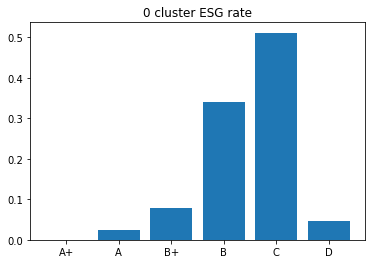

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_0[cluster_0['ESG등급']=='A+'])/129,
               len(cluster_0[cluster_0['ESG등급']=='A'])/129,
               len(cluster_0[cluster_0['ESG등급']=='B+'])/129,
               len(cluster_0[cluster_0['ESG등급']=='B'])/129,
               len(cluster_0[cluster_0['ESG등급']=='C'])/129,
               len(cluster_0[cluster_0['ESG등급']=='D'])/129]

plt.bar(group_names, values0)
plt.title("0 cluster ESG rate")
plt.show()

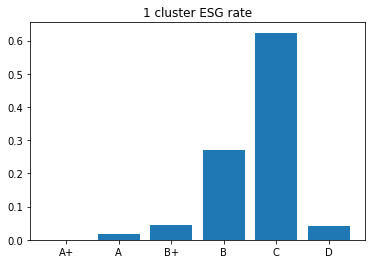

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values1 = [len(cluster_1[cluster_1['ESG등급']=='A+'])/218,
               len(cluster_1[cluster_1['ESG등급']=='A'])/218,
               len(cluster_1[cluster_1['ESG등급']=='B+'])/218,
               len(cluster_1[cluster_1['ESG등급']=='B'])/218,
               len(cluster_1[cluster_1['ESG등급']=='C'])/218,
               len(cluster_1[cluster_1['ESG등급']=='D'])/218]

plt.bar(group_names, values1)
plt.title("1 cluster ESG rate")
plt.show()

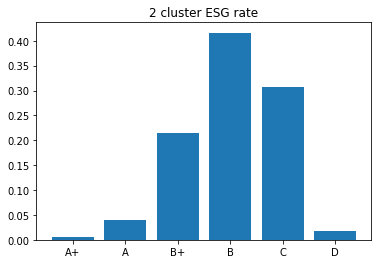

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values2 = [len(cluster_2[cluster_2['ESG등급']=='A+'])/173,
               len(cluster_2[cluster_2['ESG등급']=='A'])/173,
               len(cluster_2[cluster_2['ESG등급']=='B+'])/173,
               len(cluster_2[cluster_2['ESG등급']=='B'])/173,
               len(cluster_2[cluster_2['ESG등급']=='C'])/173,
               len(cluster_2[cluster_2['ESG등급']=='D'])/173]

plt.bar(group_names, values2)
plt.title("2 cluster ESG rate")
plt.show()

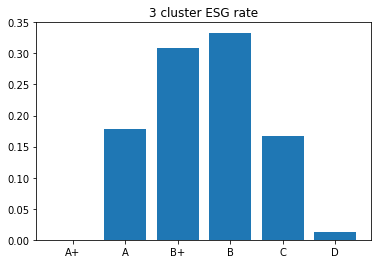

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values3 = [len(cluster_3[cluster_3['ESG등급']=='A+'])/168,
               len(cluster_3[cluster_3['ESG등급']=='A'])/168,
               len(cluster_3[cluster_3['ESG등급']=='B+'])/168,
               len(cluster_3[cluster_3['ESG등급']=='B'])/168,
               len(cluster_3[cluster_3['ESG등급']=='C'])/168,
               len(cluster_3[cluster_3['ESG등급']=='D'])/168]

plt.bar(group_names, values3)
plt.title("3 cluster ESG rate")
plt.show()

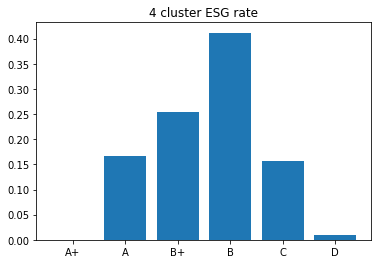

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values4 = [len(cluster_4[cluster_4['ESG등급']=='A+'])/102,
               len(cluster_4[cluster_4['ESG등급']=='A'])/102,
               len(cluster_4[cluster_4['ESG등급']=='B+'])/102,
               len(cluster_4[cluster_4['ESG등급']=='B'])/102,
               len(cluster_4[cluster_4['ESG등급']=='C'])/102,
               len(cluster_4[cluster_4['ESG등급']=='D'])/102]

plt.bar(group_names, values4)
plt.title("4 cluster ESG rate")
plt.show()

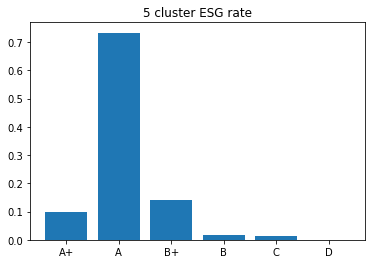

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values5 = [len(cluster_5[cluster_5['ESG등급']=='A+'])/165,
               len(cluster_5[cluster_5['ESG등급']=='A'])/165,
               len(cluster_5[cluster_5['ESG등급']=='B+'])/165,
               len(cluster_5[cluster_5['ESG등급']=='B'])/165,
               len(cluster_5[cluster_5['ESG등급']=='C'])/165,
               len(cluster_5[cluster_5['ESG등급']=='D'])/165]

plt.bar(group_names, values5)
plt.title("5 cluster ESG rate")
plt.show()

# 환경 등급

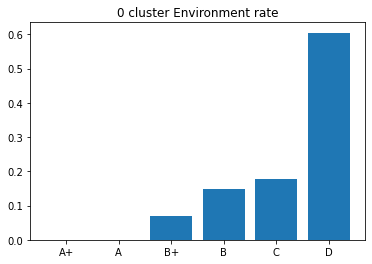

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_0[cluster_0['환경']=='A+'])/129,
               len(cluster_0[cluster_0['환경']=='A'])/129,
               len(cluster_0[cluster_0['환경']=='B+'])/129,
               len(cluster_0[cluster_0['환경']=='B'])/129,
               len(cluster_0[cluster_0['환경']=='C'])/129,
               len(cluster_0[cluster_0['환경']=='D'])/129]

plt.bar(group_names, values0)
plt.title("0 cluster Environment rate")
plt.show()

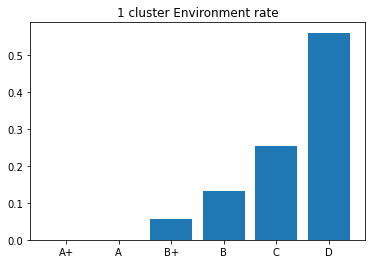

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values1 = [len(cluster_1[cluster_1['환경']=='A+'])/218,
               len(cluster_1[cluster_1['환경']=='A'])/218,
               len(cluster_1[cluster_1['환경']=='B+'])/218,
               len(cluster_1[cluster_1['환경']=='B'])/218,
               len(cluster_1[cluster_1['환경']=='C'])/218,
               len(cluster_1[cluster_1['환경']=='D'])/218]

plt.bar(group_names, values1)
plt.title("1 cluster Environment rate")
plt.show()

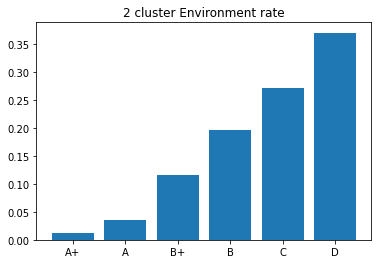

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values2 = [len(cluster_2[cluster_2['환경']=='A+'])/173,
               len(cluster_2[cluster_2['환경']=='A'])/173,
               len(cluster_2[cluster_2['환경']=='B+'])/173,
               len(cluster_2[cluster_2['환경']=='B'])/173,
               len(cluster_2[cluster_2['환경']=='C'])/173,
               len(cluster_2[cluster_2['환경']=='D'])/173]

plt.bar(group_names, values2)
plt.title("2 cluster Environment rate")
plt.show()

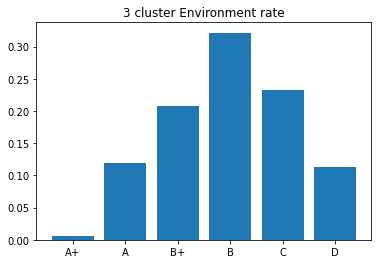

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values3 = [len(cluster_3[cluster_3['환경']=='A+'])/168,
               len(cluster_3[cluster_3['환경']=='A'])/168,
               len(cluster_3[cluster_3['환경']=='B+'])/168,
               len(cluster_3[cluster_3['환경']=='B'])/168,
               len(cluster_3[cluster_3['환경']=='C'])/168,
               len(cluster_3[cluster_3['환경']=='D'])/168]

plt.bar(group_names, values3)
plt.title("3 cluster Environment rate")
plt.show()

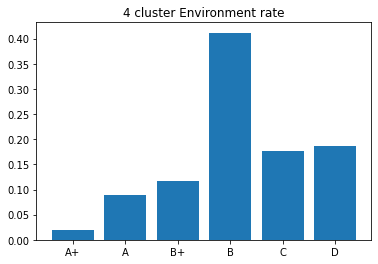

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values4 = [len(cluster_4[cluster_4['환경']=='A+'])/102,
               len(cluster_4[cluster_4['환경']=='A'])/102,
               len(cluster_4[cluster_4['환경']=='B+'])/102,
               len(cluster_4[cluster_4['환경']=='B'])/102,
               len(cluster_4[cluster_4['환경']=='C'])/102,
               len(cluster_4[cluster_4['환경']=='D'])/102]

plt.bar(group_names, values4)
plt.title("4 cluster Environment rate")
plt.show()

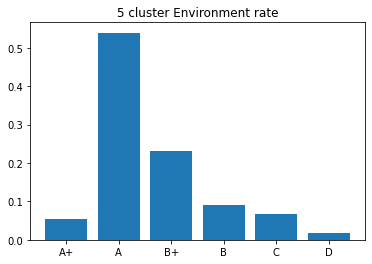

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values5 = [len(cluster_5[cluster_5['환경']=='A+'])/165,
               len(cluster_5[cluster_5['환경']=='A'])/165,
               len(cluster_5[cluster_5['환경']=='B+'])/165,
               len(cluster_5[cluster_5['환경']=='B'])/165,
               len(cluster_5[cluster_5['환경']=='C'])/165,
               len(cluster_5[cluster_5['환경']=='D'])/165]

plt.bar(group_names, values5)
plt.title("5 cluster Environment rate")
plt.show()

# 사회 등급

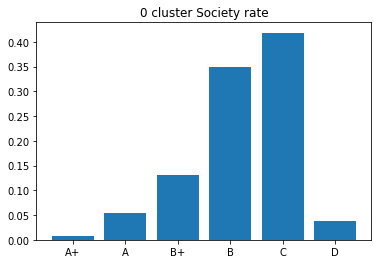

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_0[cluster_0['사회']=='A+'])/129,
               len(cluster_0[cluster_0['사회']=='A'])/129,
               len(cluster_0[cluster_0['사회']=='B+'])/129,
               len(cluster_0[cluster_0['사회']=='B'])/129,
               len(cluster_0[cluster_0['사회']=='C'])/129,
               len(cluster_0[cluster_0['사회']=='D'])/129]

plt.bar(group_names, values0)
plt.title("0 cluster Society rate")
plt.show()

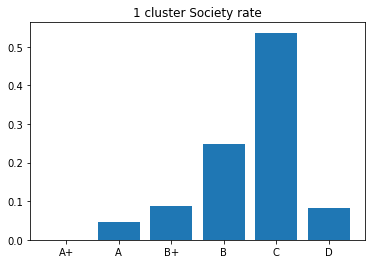

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values1 = [len(cluster_1[cluster_1['사회']=='A+'])/218,
               len(cluster_1[cluster_1['사회']=='A'])/218,
               len(cluster_1[cluster_1['사회']=='B+'])/218,
               len(cluster_1[cluster_1['사회']=='B'])/218,
               len(cluster_1[cluster_1['사회']=='C'])/218,
               len(cluster_1[cluster_1['사회']=='D'])/218]

plt.bar(group_names, values1)
plt.title("1 cluster Society rate")
plt.show()

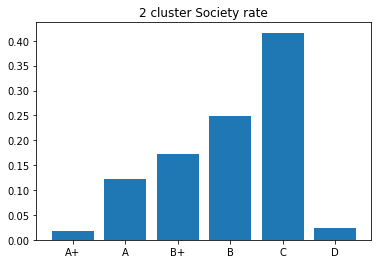

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values2 = [len(cluster_2[cluster_2['사회']=='A+'])/173,
               len(cluster_2[cluster_2['사회']=='A'])/173,
               len(cluster_2[cluster_2['사회']=='B+'])/173,
               len(cluster_2[cluster_2['사회']=='B'])/173,
               len(cluster_2[cluster_2['사회']=='C'])/173,
               len(cluster_2[cluster_2['사회']=='D'])/173]

plt.bar(group_names, values2)
plt.title("2 cluster Society rate")
plt.show()

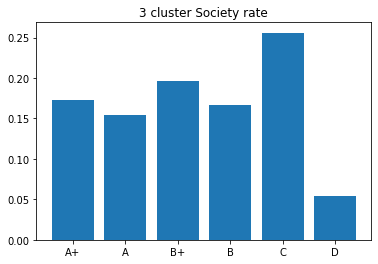

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values3 = [len(cluster_3[cluster_3['사회']=='A+'])/168,
               len(cluster_3[cluster_3['사회']=='A'])/168,
               len(cluster_3[cluster_3['사회']=='B+'])/168,
               len(cluster_3[cluster_3['사회']=='B'])/168,
               len(cluster_3[cluster_3['사회']=='C'])/168,
               len(cluster_3[cluster_3['사회']=='D'])/168]

plt.bar(group_names, values3)
plt.title("3 cluster Society rate")
plt.show()

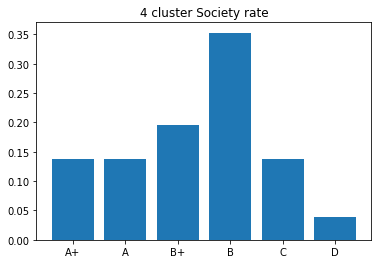

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values4 = [len(cluster_4[cluster_4['사회']=='A+'])/102,
               len(cluster_4[cluster_4['사회']=='A'])/102,
               len(cluster_4[cluster_4['사회']=='B+'])/102,
               len(cluster_4[cluster_4['사회']=='B'])/102,
               len(cluster_4[cluster_4['사회']=='C'])/102,
               len(cluster_4[cluster_4['사회']=='D'])/102]

plt.bar(group_names, values4)
plt.title("4 cluster Society rate")
plt.show()

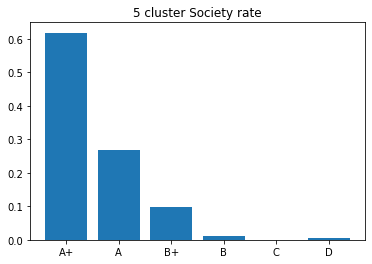

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values5 = [len(cluster_5[cluster_5['사회']=='A+'])/165,
               len(cluster_5[cluster_5['사회']=='A'])/165,
               len(cluster_5[cluster_5['사회']=='B+'])/165,
               len(cluster_5[cluster_5['사회']=='B'])/165,
               len(cluster_5[cluster_5['사회']=='C'])/165,
               len(cluster_5[cluster_5['사회']=='D'])/165]

plt.bar(group_names, values5)
plt.title("5 cluster Society rate")
plt.show()

# 지배구조 등급

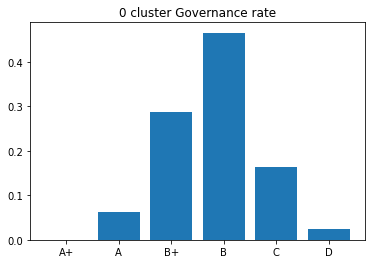

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values0 = [len(cluster_0[cluster_0['지배구조']=='A+'])/129,
               len(cluster_0[cluster_0['지배구조']=='A'])/129,
               len(cluster_0[cluster_0['지배구조']=='B+'])/129,
               len(cluster_0[cluster_0['지배구조']=='B'])/129,
               len(cluster_0[cluster_0['지배구조']=='C'])/129,
               len(cluster_0[cluster_0['지배구조']=='D'])/129]

plt.bar(group_names, values0)
plt.title("0 cluster Governance rate")
plt.show()

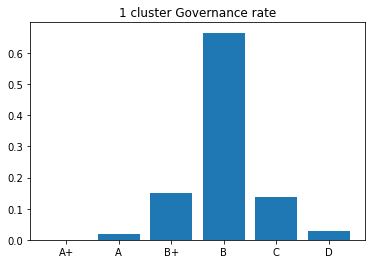

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values1 = [len(cluster_1[cluster_1['지배구조']=='A+'])/218,
               len(cluster_1[cluster_1['지배구조']=='A'])/218,
               len(cluster_1[cluster_1['지배구조']=='B+'])/218,
               len(cluster_1[cluster_1['지배구조']=='B'])/218,
               len(cluster_1[cluster_1['지배구조']=='C'])/218,
               len(cluster_1[cluster_1['지배구조']=='D'])/218]

plt.bar(group_names, values1)
plt.title("1 cluster Governance rate")
plt.show()

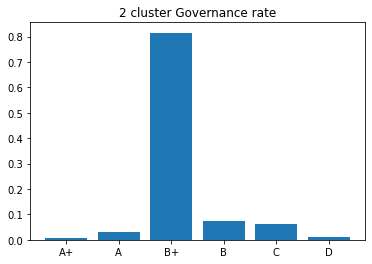

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values2 = [len(cluster_2[cluster_2['지배구조']=='A+'])/173,
               len(cluster_2[cluster_2['지배구조']=='A'])/173,
               len(cluster_2[cluster_2['지배구조']=='B+'])/173,
               len(cluster_2[cluster_2['지배구조']=='B'])/173,
               len(cluster_2[cluster_2['지배구조']=='C'])/173,
               len(cluster_2[cluster_2['지배구조']=='D'])/173]

plt.bar(group_names, values2)
plt.title("2 cluster Governance rate")
plt.show()

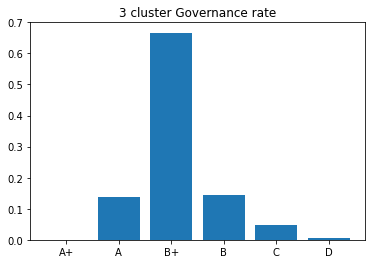

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values3 = [len(cluster_3[cluster_3['지배구조']=='A+'])/168,
               len(cluster_3[cluster_3['지배구조']=='A'])/168,
               len(cluster_3[cluster_3['지배구조']=='B+'])/168,
               len(cluster_3[cluster_3['지배구조']=='B'])/168,
               len(cluster_3[cluster_3['지배구조']=='C'])/168,
               len(cluster_3[cluster_3['지배구조']=='D'])/168]

plt.bar(group_names, values3)
plt.title("3 cluster Governance rate")
plt.show()

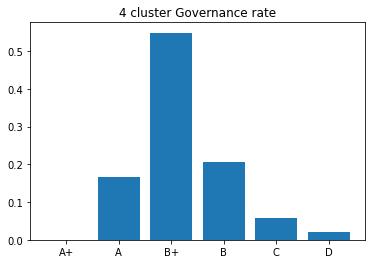

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values4 = [len(cluster_4[cluster_4['지배구조']=='A+'])/102,
               len(cluster_4[cluster_4['지배구조']=='A'])/102,
               len(cluster_4[cluster_4['지배구조']=='B+'])/102,
               len(cluster_4[cluster_4['지배구조']=='B'])/102,
               len(cluster_4[cluster_4['지배구조']=='C'])/102,
               len(cluster_4[cluster_4['지배구조']=='D'])/102]

plt.bar(group_names, values4)
plt.title("4 cluster Governance rate")
plt.show()

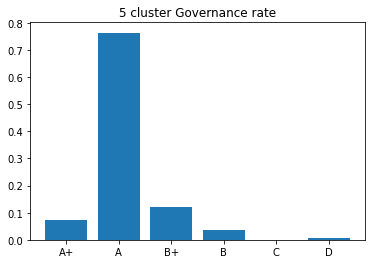

In [ ]:
group_names = ['A+', 'A', 'B+', 'B', 'C', 'D']
values5 = [len(cluster_5[cluster_5['지배구조']=='A+'])/165,
               len(cluster_5[cluster_5['지배구조']=='A'])/165,
               len(cluster_5[cluster_5['지배구조']=='B+'])/165,
               len(cluster_5[cluster_5['지배구조']=='B'])/165,
               len(cluster_5[cluster_5['지배구조']=='C'])/165,
               len(cluster_5[cluster_5['지배구조']=='D'])/165]

plt.bar(group_names, values5)
plt.title("5 cluster Governance rate")
plt.show()